# Week10 - Lab

* Use PCA to reduce dimentionality and use a linear regression to predict
* Use t-SNE to visualize

In [1]:
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
X = cancer['data']
y = cancer['target']
print(cancer.target_names)

['malignant' 'benign']


In [2]:
print(cancer.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [3]:
import warnings

# ignore all warnings
warnings.filterwarnings('ignore')


from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2)

print(f'Training examples: {X_train.shape[0]:,}')
print(f'Test examples: {X_test.shape[0]:,}')

Training examples: 455
Test examples: 114


In [4]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std  = sc.transform(X_test)

In [5]:
import numpy as np

cov_mat = np.cov(X_train_std.T)
print(cov_mat.round(1))

[[ 1.   0.3  1.   1.   0.2  0.5  0.7  0.8  0.1 -0.3  0.7 -0.1  0.7  0.7
  -0.2  0.2  0.2  0.4 -0.1 -0.   1.   0.3  1.   0.9  0.1  0.4  0.6  0.8
   0.2  0. ]
 [ 0.3  1.   0.4  0.3 -0.   0.3  0.3  0.3  0.1 -0.1  0.3  0.4  0.3  0.3
   0.   0.2  0.2  0.2 -0.   0.1  0.4  0.9  0.4  0.4  0.1  0.3  0.3  0.3
   0.1  0.1]
 [ 1.   0.4  1.   1.   0.2  0.6  0.7  0.9  0.2 -0.2  0.7 -0.1  0.7  0.8
  -0.2  0.3  0.3  0.4 -0.1  0.   1.   0.3  1.   0.9  0.2  0.5  0.6  0.8
   0.2  0.1]
 [ 1.   0.3  1.   1.   0.2  0.5  0.7  0.8  0.2 -0.3  0.7 -0.   0.7  0.8
  -0.2  0.2  0.3  0.4 -0.1 -0.   1.   0.3  1.   1.   0.1  0.4  0.6  0.7
   0.2  0. ]
 [ 0.2 -0.   0.2  0.2  1.   0.6  0.5  0.5  0.5  0.6  0.3  0.1  0.3  0.3
   0.3  0.3  0.2  0.4  0.2  0.3  0.2 -0.   0.2  0.2  0.8  0.5  0.4  0.5
   0.4  0.5]
 [ 0.5  0.3  0.6  0.5  0.6  1.   0.9  0.8  0.6  0.5  0.6  0.1  0.6  0.5
   0.1  0.7  0.6  0.6  0.2  0.5  0.6  0.3  0.6  0.5  0.6  0.9  0.8  0.8
   0.5  0.7]
 [ 0.7  0.3  0.7  0.7  0.5  0.9  1.   0.9  0.5  0.3  0.7  

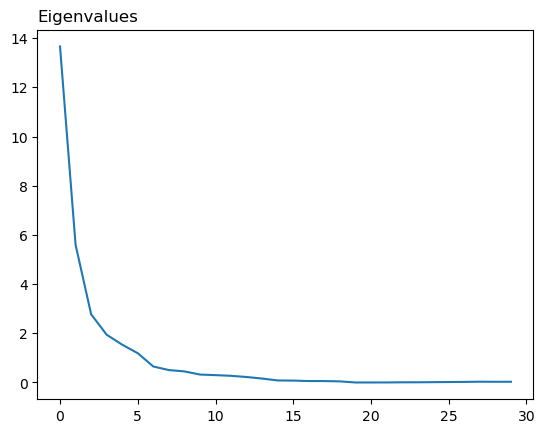

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline
eigen_vals, eigen_vecs = np.linalg.eig(cov_mat)

plt.plot(eigen_vals)
plt.title('Eigenvalues', loc='left')
plt.show()

In [7]:
tot = sum(eigen_vals)

var_exp = [(i / tot) for i in sorted(eigen_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)

In [8]:
eigen_pairs = [(np.abs(eigen_vals[i]), eigen_vecs[:, i]) for i in range(len(eigen_vals))]
eigen_pairs.sort(key=lambda k: k[0], reverse=True)

In [9]:
w = np.hstack((eigen_pairs[0][1][:, np.newaxis],
              eigen_pairs[1][1][:, np.newaxis]))

print(w)

[[ 0.21827334 -0.22918573]
 [ 0.10959281 -0.06857704]
 [ 0.22659758 -0.21060401]
 [ 0.22122197 -0.22332779]
 [ 0.13303405  0.1927303 ]
 [ 0.23856174  0.14479063]
 [ 0.25584022  0.05585   ]
 [ 0.25715413 -0.03114537]
 [ 0.13592586  0.20335388]
 [ 0.06194331  0.36807735]
 [ 0.21166704 -0.08315392]
 [ 0.02492267  0.09507911]
 [ 0.21787217 -0.06774198]
 [ 0.21062434 -0.13560088]
 [ 0.01143659  0.22509433]
 [ 0.17235928  0.23353402]
 [ 0.15965346  0.19338124]
 [ 0.18071893  0.13351734]
 [ 0.03409132  0.21260549]
 [ 0.10399936  0.28826   ]
 [ 0.22683799 -0.21933647]
 [ 0.10872995 -0.06390262]
 [ 0.23556032 -0.19902407]
 [ 0.2238403  -0.2160124 ]
 [ 0.12328531  0.17121472]
 [ 0.21065953  0.12917854]
 [ 0.23017899  0.07685513]
 [ 0.24738427 -0.01905171]
 [ 0.11859172  0.13554751]
 [ 0.13282507  0.26971505]]


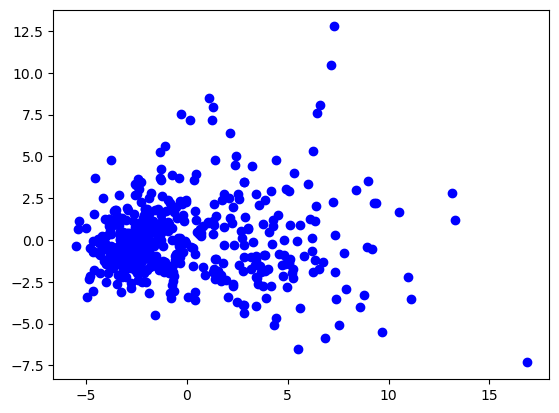

In [10]:
X_train_pca = X_train_std.dot(w)

plt.plot(X_train_pca[:,0], X_train_pca[:,1], 'bo')
plt.show()

In [11]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA

p = Pipeline([('scaling', StandardScaler()), 
              ('pca', PCA()),
              ('model', LinearRegression())
             ])

params = {'model__normalize': [True,False], 'pca__n_components': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]}

gs = GridSearchCV(p, param_grid=params, scoring='r2', cv=10, refit=True)
gs = gs.fit(X_train, y_train)

gs.best_estimator_


Pipeline(steps=[('scaling', StandardScaler()), ('pca', PCA(n_components=8)),
                ('model', LinearRegression(normalize=True))])

In [12]:
print(f'Validation score: {gs.best_score_:.2%}')
print(f'Test score: {gs.score(X_test, y_test):.2%}')

Validation score: 68.82%
Test score: 74.67%


In [13]:
from sklearn.manifold import TSNE
import seaborn as sns
import matplotlib.pyplot as plt
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
tsne = TSNE(n_components=2, perplexity=30, n_iter=5000)
X_tsne = tsne.fit_transform(X_scaled)

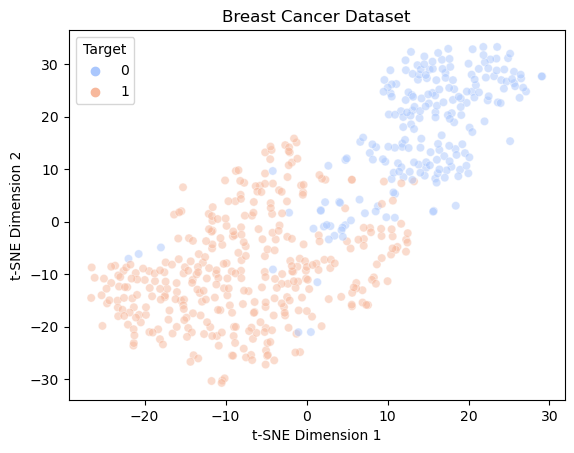

In [14]:

# create a scatterplot with t-SNE embeddings
sns.scatterplot(x=X_tsne[:, 0], y=X_tsne[:, 1], hue=y, palette='coolwarm', alpha=0.5)

# customize the plot
plt.title('Breast Cancer Dataset')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.legend(title='Target', loc='best')
plt.show()
